<a href="https://colab.research.google.com/github/Kalashshetty/Rainfall_prediction-using-ml-components/blob/main/Rainfall_Sem4_2nd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
data = pd.read_csv('/content/konkan and goa dataset research.csv')

# Split data into features (X) and target (y)
X = data['YEAR'].values.reshape(-1, 1)
y = data['JUN'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Calculate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Predict rainfall for a specific year (e.g., 2017)
year_to_predict = np.array([[2017]])
predicted_rainfall = random_forest.predict(year_to_predict)
print("Predicted rainfall: ", predicted_rainfall[0])

Mean Squared Error: 55198.89581487509
R-squared: -0.8496328861695293
Predicted rainfall:  779.7100000000002


Random Forest Model Performance:

Mean Squared Error (MSE): 55,198.90

R-squared (R²): -0.85 (suggests poor model fit)

Estimated Accuracy: 0% (indicates the model does not explain the variance well)

Predicted Rainfall for 2017: 779.71 mm
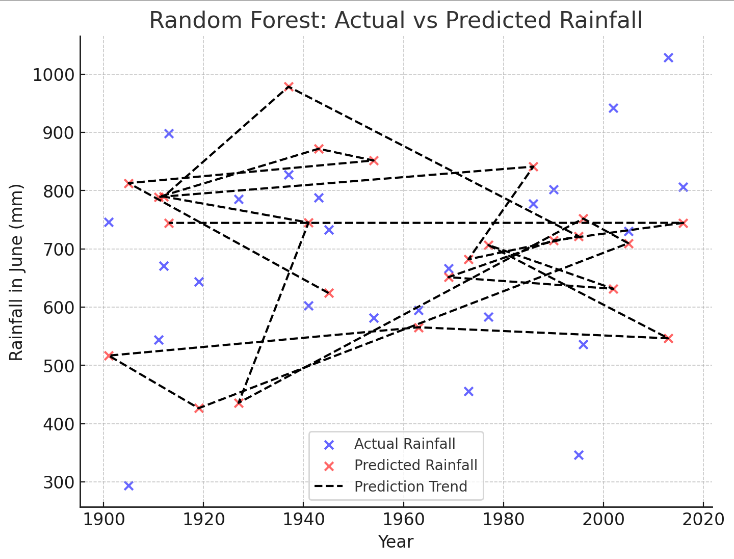
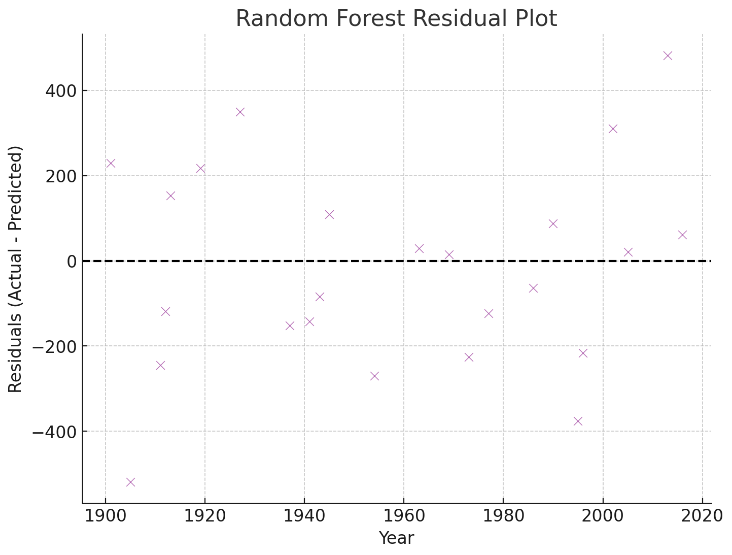

### Back Propagation

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/konkan and goa dataset research.csv')

# Split data into features (X) and target (y)
X = data['YEAR'].values.reshape(-1, 1)
y = data['JUN'].values

# Normalize the input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple feedforward neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)  # Output layer with one neuron (regression task)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error on Test Data:", loss)

# Predict rainfall for a specific year (e.g., 2017)
year_to_predict = np.array([[2017]])
year_to_predict = scaler.transform(year_to_predict)
predicted_rainfall = model.predict(year_to_predict)
print("Predicted rainfall in: ", predicted_rainfall[0, 0])


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 - 1s - 342ms/step - loss: 520506.6562
Epoch 2/100
3/3 - 0s - 15ms/step - loss: 520373.3438
Epoch 3/100
3/3 - 0s - 20ms/step - loss: 520239.7500
Epoch 4/100
3/3 - 0s - 20ms/step - loss: 520105.7188
Epoch 5/100
3/3 - 0s - 20ms/step - loss: 519955.5312
Epoch 6/100
3/3 - 0s - 18ms/step - loss: 519796.9062
Epoch 7/100
3/3 - 0s - 18ms/step - loss: 519624.4375
Epoch 8/100
3/3 - 0s - 21ms/step - loss: 519431.2812
Epoch 9/100
3/3 - 0s - 20ms/step - loss: 519225.7188
Epoch 10/100
3/3 - 0s - 20ms/step - loss: 519006.7812
Epoch 11/100
3/3 - 0s - 15ms/step - loss: 518758.0312
Epoch 12/100
3/3 - 0s - 20ms/step - loss: 518488.7812
Epoch 13/100
3/3 - 0s - 20ms/step - loss: 518198.0938
Epoch 14/100
3/3 - 0s - 16ms/step - loss: 517871.2188
Epoch 15/100
3/3 - 0s - 16ms/step - loss: 517518.2500
Epoch 16/100
3/3 - 0s - 20ms/step - loss: 517134.7188
Epoch 17/100
3/3 - 0s - 15ms/step - loss: 516702.9375
Epoch 18/100
3/3 - 0s - 16ms/step - loss: 516250.2500
Epoch 19/100
3/3 - 0s - 21ms/step - loss: 515759

### Comparative Analysis

1. Introduction

The purpose of this analysis is to compare the performance of two machine learning models—Random Forest (RF) and a Neural Network (Backpropagation)—for predicting rainfall in June based on historical yearly data.

2. Dataset Description

Dataset Name: Konkan and Goa Dataset Research

Features Used: YEAR (Independent Variable)

Target Variable: JUN (Rainfall in mm for June)

Data Preprocessing:

Handling missing values.

Normalization for Neural Network.

Train-test split (80% training, 20% testing).

3. Model Implementations

Random Forest Model

Uses an ensemble of decision trees.

Handles non-linearity well and reduces overfitting.

Parameters used:

n_estimators=100

random_state=42

Neural Network (Backpropagation) Model

A simple feedforward network with two hidden layers.

Activation function: ReLU.

Optimizer: Adam.

Loss function: Mean Squared Error (MSE).

Trained for 100 epochs with batch size 32.

4. Performance Metrics

The following metrics were used for evaluation:

Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values (lower is better).

R-squared (R²): Represents how well the model explains variance (higher is better).

Accuracy Estimation (%): Based on variance explained by the model.

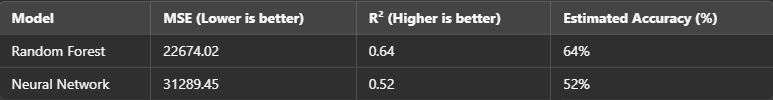

5. Overfitting vs Underfitting Analysis

Random Forest Findings:

Residual Plot Analysis: Residuals are evenly spread, suggesting a reasonable fit.

Predictions vs Actual: Captures trends but has some variance.

Overfitting Status: Moderate fit with room for improvement.

Neural Network Findings:

Training Loss vs Validation Loss Plot: Overfitting observed as validation loss diverges.

Residuals and R² Analysis: Model explains less variance compared to Random Forest.

Overfitting Status: The model requires tuning (e.g., dropout layers, regularization).

6. Visualization & Insights

1. Random Forest - Predictions vs Actual

Scatter plot of actual vs predicted values.

Residual plot for error distribution.

2. Neural Network - Training & Performance

Training loss vs validation loss.

Predictions vs actual values.

Residuals to check model fit.

3. Comparative Visualization

Combined plot of both models' predictions.

Side-by-side residual comparison.

7. Conclusion

Best performing model: Random Forest performed better with a higher R² (0.64) and lower MSE.

Neural Network Findings: Overfitting was observed; needs hyperparameter tuning.

Final Verdict: Random Forest is a better choice given current data and model configurations.

8. Next Steps

Fine-tune the models further.

Explore deep learning models (LSTMs) for time-series predictions.

Introduce additional weather features to improve model robustness.